In [9]:
res_dir = 'results/2GRU-128-L8-L6-bs32'
seeds = [23, 89, 196, 27863]
import json
from os.path import exists

for i in seeds:
  ff = f"{res_dir}/seed{i}/overview.json"
  if not exists(ff):
    overview = {}
  else:
    with open(ff,'r') as f:
      overview = json.load(f)
    

  print(f"{overview.get('train_accuracy','')}")
  print(f"{overview.get('val_accuracy','')}")
  print(f"{overview.get('test_accuracy','')}")
  print()





0.9824762940406799
0.18726474046707153
0.2867377996444702











In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (35,4)

all_metrics = ['accuracy',  'd_loss', 'total_g_loss', 'c_loss', 'g_loss', 'imp_loss', 'reg_loss']

def concat_metrics(*values):
  first, last = values[0], values[-1]
  res = {}
  for key in first.keys():
    if key != 'test_accuracy':
      res[key] = [v for s in values for v in s[key]]

  res['test_accuracy'] = last['test_accuracy']
  return res

def plot_metrics(metrics):
  n = len(all_metrics)
  plt.subplots(1,n)

  for i, key in enumerate(all_metrics):
    plt.subplot(1,n, i+1)
    data = metrics.get(key, [])
    plt.plot(range(len(data)),data)

    if f"val_{key}" in metrics:
      data = metrics.get(f"val_{key}", [])
      plt.plot(range(len(data)),data, color='orange')


    if key == 'accuracy' and 'test_accuracy' in metrics:
      plt.axhline(y=metrics['test_accuracy'], linestyle = 'dashed', color='magenta')
    plt.title(key)

  plt.tight_layout()
  return plt.show()

In [42]:
all_keys = [
  ['accuracy', 'val_accuracy'],
  ['total_g_loss', 'c_loss', 'g_loss', 'imp_loss', 'reg_loss'],
  ['d_loss']
]

def plot_all(metrics):
    n = len(all_keys)
    plt.rcParams["figure.figsize"] = (n*4,3)
    plt.subplots(1,n)
    for i, keys in enumerate(all_keys):
      plt.subplot(1,n, i+1)
      for key in keys:
        data = metrics.get(key, [])
        plt.plot(range(len(data)),data, label=key)
      plt.legend()
    return plt.show()
      
   

In [19]:
import csv
def get_metrics(res_dir):
  with open(f"{res_dir}/trainlog.csv") as f:
    reader = csv.reader(f)
    keys =next(reader)
    metrics = {k:[] for k in keys}
    
    for row in reader:
      for k,v in zip(keys, row):
        metrics[k].append(float(v))
  return metrics


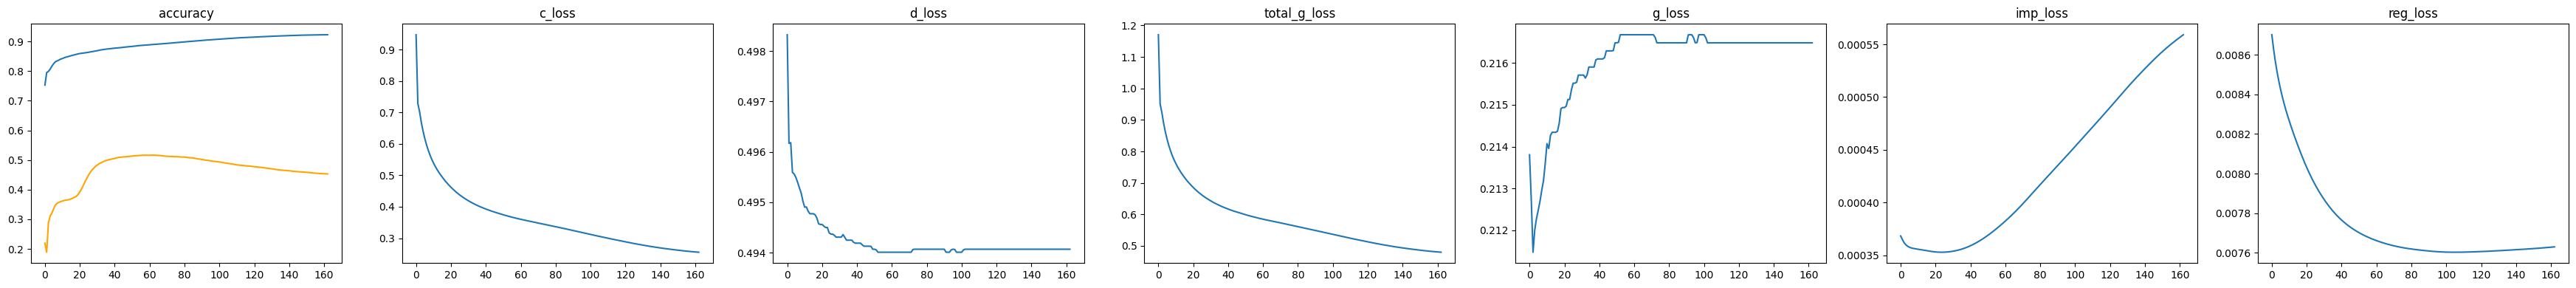

In [20]:
plot_metrics(get_metrics('results/week47/GRU128-LR6-BS64/seed89'))

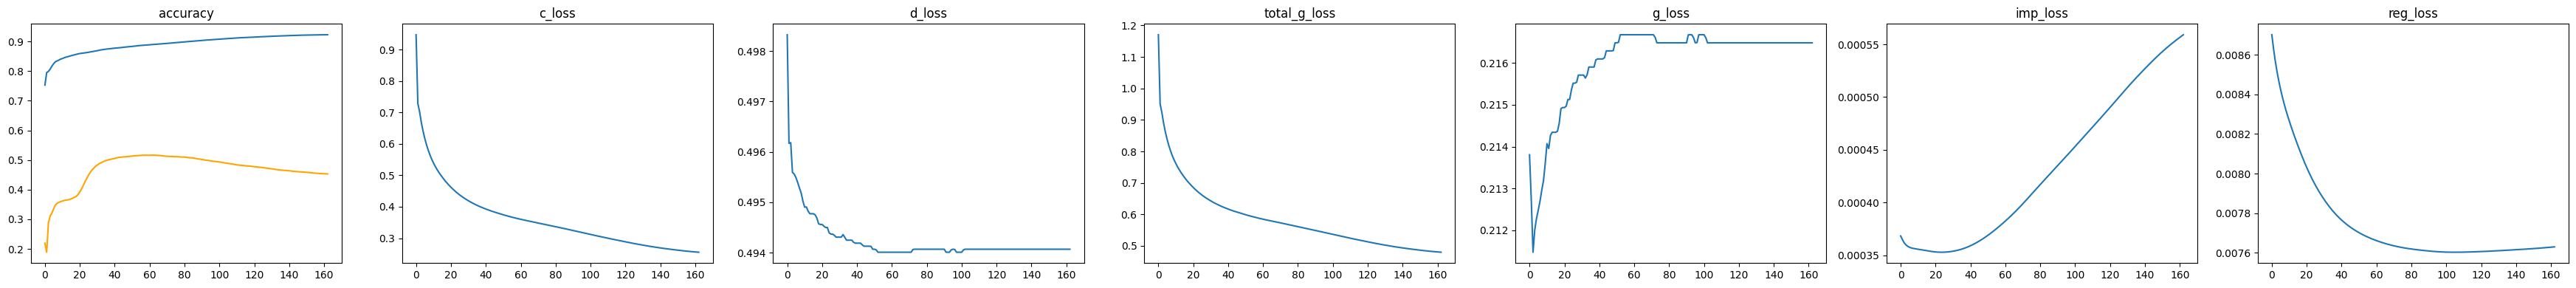

In [22]:
plot_metrics(get_metrics('results/week47/GRU128-LR6-BS128/seed89'))

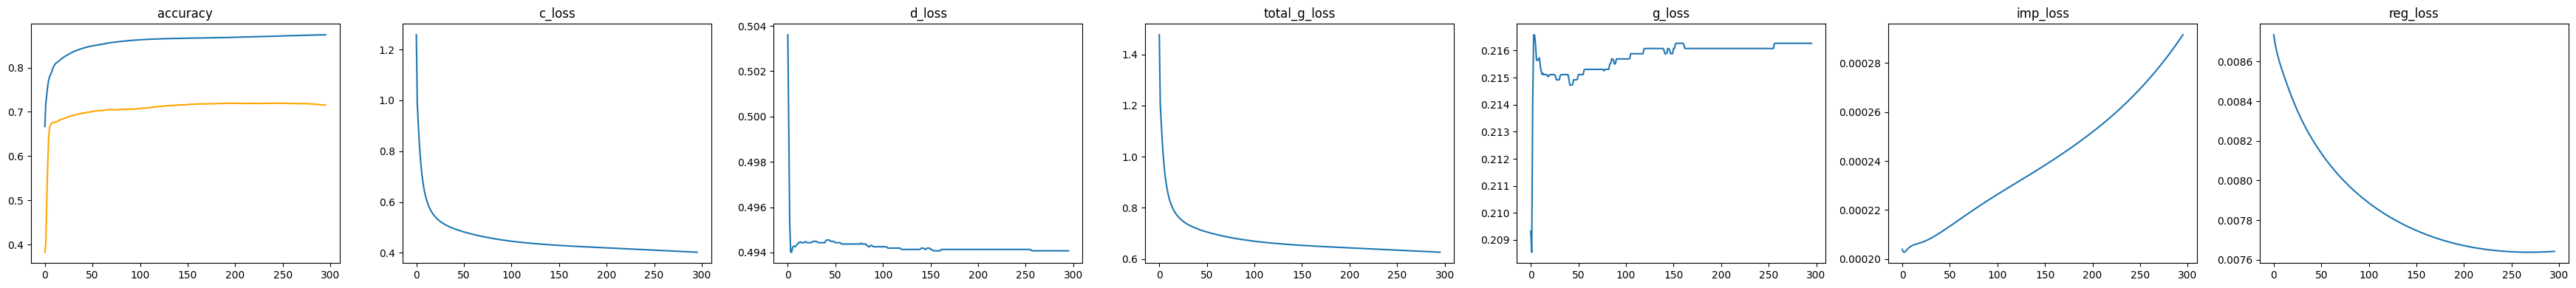

In [23]:
plot_metrics(get_metrics('results/week47/GRU128-LR6-BS256/seed89'))

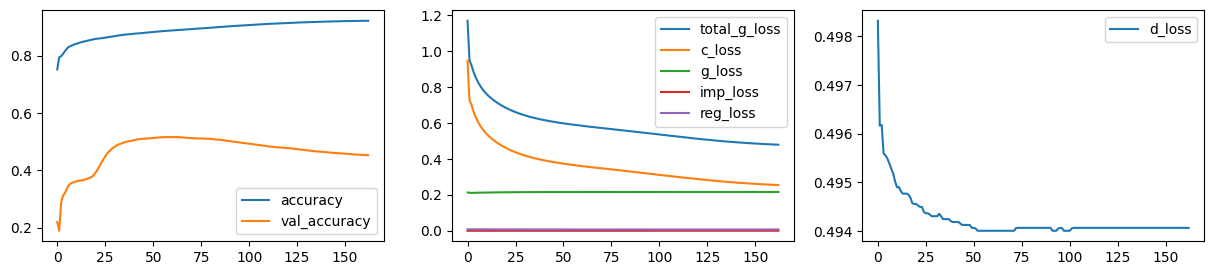

In [44]:
plt.rcParams["figure.figsize"] = (15,3)
plot_all(get_metrics('results/week47/GRU128-LR6-BS128/seed89'))